In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
final_csv = 'data/final_movies2.csv'

final = pd.read_csv(final_csv)

final = final.drop(columns=['Unnamed: 0'])
final.head()

,Movie Title,Opening,Total Gross,% of Total,Theaters,Average per Theater,Date,Season Number,Release Year,Movie & Year,...,revenue,runtime,title,vote_average,vote_count,Genre Ids,Genre Names,Company Ids,Company Names,budget2
0,Jurassic World,208806270.0,652270625.0,32%,4274.0,48855.0,2015-06-12,3.0,2015.0,Jurassic World (2015),...,1.513529e+09,124.0,Jurassic World,6.5,8842.0,28,Action,13.0,Universal Studios,150000000.0
1,The Avengers,207438708.0,623357910.0,33.3%,4349.0,47698.0,2012-05-04,2.0,2012.0,The Avengers (2012),...,1.519558e+09,143.0,The Avengers,7.4,12000.0,878,Science Fiction,4.0,Paramount Pictures,220000000.0
2,Avengers: Age of Ultron,191271109.0,459005868.0,41.7%,4276.0,44731.0,2015-05-01,2.0,2015.0,Avengers: Age of Ultron (2015),...,1.405404e+09,141.0,Avengers: Age of Ultron,7.3,6908.0,28,Action,420.0,Marvel Studios,280000000.0
3,Captain America: Civil War,179139142.0,408084349.0,43.9%,4226.0,42389.0,2016-05-06,2.0,2016.0,Captain America: Civil War (2016),...,1.153304e+09,147.0,Captain America: Civil War,7.1,7462.0,12,Adventure,264.0,Studio Babelsberg,250000000.0
4,Beauty and the Beast,174750616.0,504014165.0,34.7%,4210.0,41508.0,2017-03-17,2.0,2017.0,Beauty and the Beast (2017),...,1.262886e+09,129.0,Beauty and the Beast,6.8,5530.0,10751,Family,2.0,Walt Disney Pictures,160000000.0


In [3]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = final[["Opening", "budget2", "Theaters"]].values.reshape(-1, 3)
y = final["Total Gross"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (818, 3) (818, 1)


In [4]:
# Plot the data to see if a linear trend exists

#plt.scatter(X, y)
#plt.xlabel("Opening")
#plt.ylabel("Total Gross")


In [5]:
# Use sklearn's `train_test_split` to split the data into training and testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [6]:
# narrow down data
#new = old[['A', 'C', 'D']].copy()
testing_df = final[['Opening','Total Gross', 'Theaters', 'Average per Theater', 'revenue', 'runtime', 'vote_average', 'budget2']].copy()
testing_df

,Opening,Total Gross,Theaters,Average per Theater,revenue,runtime,vote_average,budget2
0,208806270.0,652270625.0,4274.0,48855.0,1.513529e+09,124.0,6.5,150000000.0
1,207438708.0,623357910.0,4349.0,47698.0,1.519558e+09,143.0,7.4,220000000.0
2,191271109.0,459005868.0,4276.0,44731.0,1.405404e+09,141.0,7.3,280000000.0
3,179139142.0,408084349.0,4226.0,42389.0,1.153304e+09,147.0,7.1,250000000.0
4,174750616.0,504014165.0,4210.0,41508.0,1.262886e+09,129.0,6.8,160000000.0
...,...,...,...,...,...,...,...,...
813,19875995.0,50856010.0,2858.0,6954.0,1.035903e+08,89.0,4.9,5000000.0
814,19828687.0,48071303.0,3065.0,6469.0,9.618890e+07,117.0,7.1,28000000.0
815,19810585.0,42670410.0,2357.0,8405.0,7.651405e+07,87.0,4.8,16000000.0
816,19806226.0,60240295.0,2657.0,7454.0,1.028258e+08,96.0,5.7,47000000.0


In [7]:
# import seaborn as sns

# sns.pairplot(testing_df)
# plt.show()

In [8]:
# corr = testing_df.corr()
# plt.figure(figsize=(10,10)) 
# sns.heatmap(corr, annot=True)

In [9]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import LabelEncoder
seasons = final[['Season Number', 'Season Name']]
seasons

,Season Number,Season Name
0,3.0,Summer
1,2.0,Spring
2,2.0,Spring
3,2.0,Spring
4,2.0,Spring
...,...,...
813,4.0,Fall
814,2.0,Spring
815,1.0,Winter
816,3.0,Summer


In [10]:
data = seasons.values
X = data[:, 0:1]
y = data[:, 1]

In [11]:
label_encoder = LabelEncoder()
label_encoder.fit(y)
encoded_y = label_encoder.transform(y)

In [12]:
for label, original_class in zip(encoded_y, y):
    print('Season Name: ' + str(original_class))
    print('Encoded Label: ' + str(label))
    print('-' * 12)

Season Name: Summer
Encoded Label: 2
------------
Season Name: Spring
Encoded Label: 1
------------
Season Name: Spring
Encoded Label: 1
------------
Season Name: Spring
Encoded Label: 1
------------
Season Name: Spring
Encoded Label: 1
------------
Season Name: Spring
Encoded Label: 1
------------
Season Name: Summer
Encoded Label: 2
------------
Season Name: Spring
Encoded Label: 1
------------
Season Name: Summer
Encoded Label: 2
------------
Season Name: Summer
Encoded Label: 2
------------
Season Name: Fall
Encoded Label: 0
------------
Season Name: Winter
Encoded Label: 3
------------
Season Name: Spring
Encoded Label: 1
------------
Season Name: Spring
Encoded Label: 1
------------
Season Name: Spring
Encoded Label: 1
------------
Season Name: Spring
Encoded Label: 1
------------
Season Name: Fall
Encoded Label: 0
------------
Season Name: Fall
Encoded Label: 0
------------
Season Name: Fall
Encoded Label: 0
------------
Season Name: Summer
Encoded Label: 2
------------
Season N

------------
Season Name: Fall
Encoded Label: 0
------------
Season Name: Fall
Encoded Label: 0
------------
Season Name: Summer
Encoded Label: 2
------------
Season Name: Fall
Encoded Label: 0
------------
Season Name: Summer
Encoded Label: 2
------------
Season Name: Fall
Encoded Label: 0
------------
Season Name: Summer
Encoded Label: 2
------------
Season Name: Summer
Encoded Label: 2
------------
Season Name: Spring
Encoded Label: 1
------------
Season Name: Summer
Encoded Label: 2
------------
Season Name: Summer
Encoded Label: 2
------------
Season Name: Fall
Encoded Label: 0
------------
Season Name: Spring
Encoded Label: 1
------------
Season Name: Spring
Encoded Label: 1
------------
Season Name: Winter
Encoded Label: 3
------------
Season Name: Fall
Encoded Label: 0
------------
Season Name: Summer
Encoded Label: 2
------------
Season Name: Fall
Encoded Label: 0
------------
Season Name: Winter
Encoded Label: 3
------------
Season Name: Winter
Encoded Label: 3
------------
S

In [13]:
import tensorflow as tf

In [19]:
!pip install keras==2.3.0

from keras.utils import to_categorical

# Step 2: One-hot encoding
one_hot_y = to_categorical(encoded_y)
one_hot_y

array([[0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]], dtype=float32)

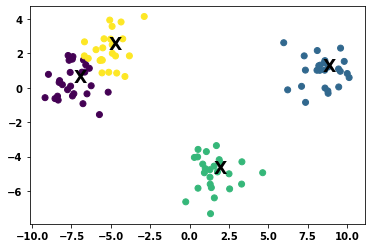

In [52]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

X = testing_df['Total Gross']
y = one_hot_y

X, y = make_blobs(n_samples=100, centers=4)

kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

for center in kmeans.cluster_centers_:
    plt.text(s='X', x=center[0], y=center[1], color='k', size='xx-large')

x, y = X[:,0], X[:, 1] # all rows, single column
plt.scatter(x, y, c=kmeans.labels_)
plt.show()

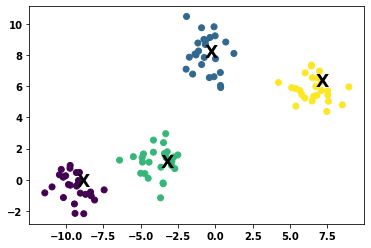

In [48]:
from sklearn.cluster import AffinityPropagation

X = testing_df['Total Gross']
y = one_hot_y

X, y = make_blobs(n_samples=100, centers=4)

af = AffinityPropagation()
af.fit(X)

for center in af.cluster_centers_:
    plt.text(s='X', x=center[0], y=center[1], color='k', size='xx-large')
    
x, y = X[:,0], X[:, 1]
plt.scatter(x, y, c=af.labels_)
plt.show()